# Perform General Data Exploration and Cleaning

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Option setting 
%matplotlib inline 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Import data
df_raw_data = pd.read_csv('CarData.csv',
                       delimiter = ',')
df_raw_data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.5,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.1,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.1,5.0


In [3]:
# Create a copy of the data
df_copy = df_raw_data.copy()
df_copy.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [4]:
# Check for dataset general information
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [5]:
# Check for missing values
for cols in df_copy.columns:
    total_missing_values = np.nansum(df_copy[cols].isnull())
    print("{}: {}".format(cols, total_missing_values))

name: 0
year: 0
selling_price: 0
km_driven: 0
fuel: 0
seller_type: 0
transmission: 0
owner: 0
mileage(km/ltr/kg): 221
engine: 221
max_power: 215
seats: 221


In [6]:
# Change the datatype of the max_power column to perform calculation
df_copy['max_power'] = pd.to_numeric(df_copy['max_power'], errors='coerce')
df_copy['max_power'].head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [7]:
# Filling missing values with the mean of each column
temporary_fill_mileage = np.nanmean(df_copy['mileage(km/ltr/kg)'])
temporary_fill_engine = np.nanmean(df_copy['engine'])
temporary_fill_max_power = np.nanmean(df_copy['max_power'])
temporary_fill_seats = np.nanmean(df_copy['seats'])

df_copy['mileage(km/ltr/kg)'] = df_copy['mileage(km/ltr/kg)'].fillna(temporary_fill_mileage)
df_copy['engine'] = df_copy['engine'].fillna(temporary_fill_engine)
df_copy['max_power'] = df_copy['max_power'].fillna(temporary_fill_max_power)
df_copy['seats'] = df_copy['seats'].fillna(temporary_fill_seats)

# Perform Data Exploration And Cleaning For Each Column 

# Column 3: selling_price

In [8]:
# Divide the values with 1000 to reduce zeros to save memory
divide_by_thousand = lambda p: p/1000
df_copy['selling_price'] = divide_by_thousand(df_copy['selling_price'].values)

df_copy['selling_price'] = df_copy['selling_price'].astype(dtype = int)
df_copy['selling_price'].head()

0    450
1    370
2    158
3    225
4    130
Name: selling_price, dtype: int32

# Column 6: seller_type

In [9]:
df_copy.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,5.0
7,Maruti 800 DX BSII,2001,45,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0
8,Toyota Etios VXD,2011,350,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0
9,Ford Figo Diesel Celebration Edition,2013,200,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0


In [10]:
pd.unique(df_copy['seller_type'])

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [11]:
# There are three types of sellers, which can be represented by dummy variable to save memory better
seller_type = pd.get_dummies(df_copy['seller_type'])

In [12]:
seller_type = seller_type.astype(dtype = int)
seller_type.head(10)

,Dealer,Individual,Trustmark Dealer
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [13]:
# Concatenate these columns to the dataset
df_copy = pd.concat([df_copy, seller_type], axis = 1)

In [14]:
# Drop column seller_type
df_copy = df_copy.drop('seller_type', axis = 1)
df_copy.head(10)

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,Dealer,Individual,Trustmark Dealer
0,Maruti Swift Dzire VDI,2014,450,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0,0,1,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0,0,1,0
2,Honda City 2017-2020 EXi,2006,158,140000,Petrol,Manual,Third Owner,17.70,1497.0,78.00,5.0,0,1,0
3,Hyundai i20 Sportz Diesel,2010,225,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0,0,1,0
4,Maruti Swift VXI BSIII,2007,130,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,5.0,0,1,0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440,45000,Petrol,Manual,First Owner,20.14,1197.0,81.86,5.0,0,1,0
6,Maruti Wagon R LXI DUO BSIII,2007,96,175000,LPG,Manual,First Owner,17.30,1061.0,57.50,5.0,0,1,0
7,Maruti 800 DX BSII,2001,45,5000,Petrol,Manual,Second Owner,16.10,796.0,37.00,4.0,0,1,0
8,Toyota Etios VXD,2011,350,90000,Diesel,Manual,First Owner,23.59,1364.0,67.10,5.0,0,1,0
9,Ford Figo Diesel Celebration Edition,2013,200,169000,Diesel,Manual,First Owner,20.00,1399.0,68.10,5.0,0,1,0


# Column 7: owner

In [15]:
pd.unique(df_copy['owner'])

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [16]:
# Replace the values of owner column with numbers to save memory
owner_replace_values = {'First Owner': 1, 'Second Owner': 2,'Third Owner': 3, 'Fourth & Above Owner': 4}
df_copy['owner'] = df_copy['owner'].replace(owner_replace_values)
df_copy['owner'].head(10)

0    1
1    2
2    3
3    1
4    1
5    1
6    1
7    2
8    1
9    1
Name: owner, dtype: object

# Changing datatype for the remaining columns

In [17]:
df_copy['mileage(km/ltr/kg)'] = df_copy['mileage(km/ltr/kg)'].astype(dtype = int)
df_copy['engine'] = df_copy['engine'].astype(dtype = int)
df_copy['max_power'] = df_copy['max_power'].astype(dtype = int)
df_copy['seats'] = df_copy['seats'].astype(dtype = int)

In [18]:
df_copy.iloc[:11,7:11]

,mileage(km/ltr/kg),engine,max_power,seats
0,23,1248,74,5
1,21,1498,103,5
2,17,1497,78,5
3,23,1396,90,5
4,16,1298,88,5
5,20,1197,81,5
6,17,1061,57,5
7,16,796,37,4
8,23,1364,67,5
9,20,1399,68,5


# Modify and reorder column names 

In [19]:
df_copy.columns.values

array(['name', 'year', 'selling_price', 'km_driven', 'fuel',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine',
       'max_power', 'seats', 'Dealer', 'Individual', 'Trustmark Dealer'],
      dtype=object)

In [20]:
# Change column names
column_names = ['Model Name', 'Manufactured Year', 'Price (in thousand)', 'KM driven', 
                'Type of Fuel','Transmission', 'Type of Owner', 'Mileage(km/ltr/kg)', 
                'Engine', 'Max Power', 'Number of Seats',
                'Dealer', 'Individual', 'Trustmark Dealer']

df_copy.columns = column_names

In [21]:
df_copy.head(0)

,Model Name,Manufactured Year,Price (in thousand),KM driven,Type of Fuel,Transmission,Type of Owner,Mileage(km/ltr/kg),Engine,Max Power,Number of Seats,Dealer,Individual,Trustmark Dealer


In [22]:
# Reorder column names
column_names_reordered = ['Model Name', 'Manufactured Year', 'Price (in thousand)', 'KM driven',
                          'Type of Fuel', 'Individual', 'Dealer', 'Trustmark Dealer', 
                          'Transmission', 'Type of Owner', 'Mileage(km/ltr/kg)', 
                          'Engine', 'Max Power', 'Number of Seats']

df_copy = df_copy[column_names_reordered]

In [23]:
df_copy.head(0)

,Model Name,Manufactured Year,Price (in thousand),KM driven,Type of Fuel,Individual,Dealer,Trustmark Dealer,Transmission,Type of Owner,Mileage(km/ltr/kg),Engine,Max Power,Number of Seats


# Data Interpretation and Visualization

In [24]:
# Get the distribution of price through histogram
price_distribution = np.histogram(df_copy['Price (in thousand)'], bins = 20)
price_distribution

(array([4819, 2499,  285,  167,   59,   70,   55,   44,   11,    2,  101,
          12,    1,    1,    1,    0,    0,    0,    0,    1], dtype=int64),
 array([   29.  ,   527.55,  1026.1 ,  1524.65,  2023.2 ,  2521.75,
         3020.3 ,  3518.85,  4017.4 ,  4515.95,  5014.5 ,  5513.05,
         6011.6 ,  6510.15,  7008.7 ,  7507.25,  8005.8 ,  8504.35,
         9002.9 ,  9501.45, 10000.  ]))

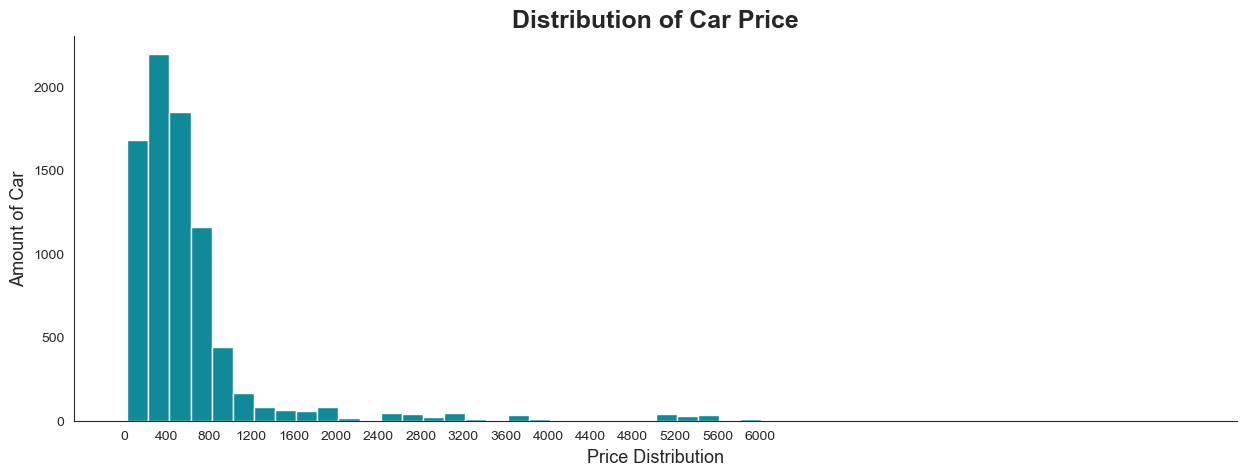

In [25]:
# Visualize the histogram with Matplotlib
sns.set_style('white')
plt.figure(figsize = (15,5))
plt.hist(df_copy['Price (in thousand)'],
         bins = 50,
         color = '#108A99')
plt.xlabel('Price Distribution',fontsize = 13)
plt.ylabel('Amount of Car',fontsize = 13)
plt.xticks(np.arange(0,6001,400))

plt.title('Distribution of Car Price',
          fontsize = 18,
          fontweight = 'bold')
sns.despine()
plt.show()

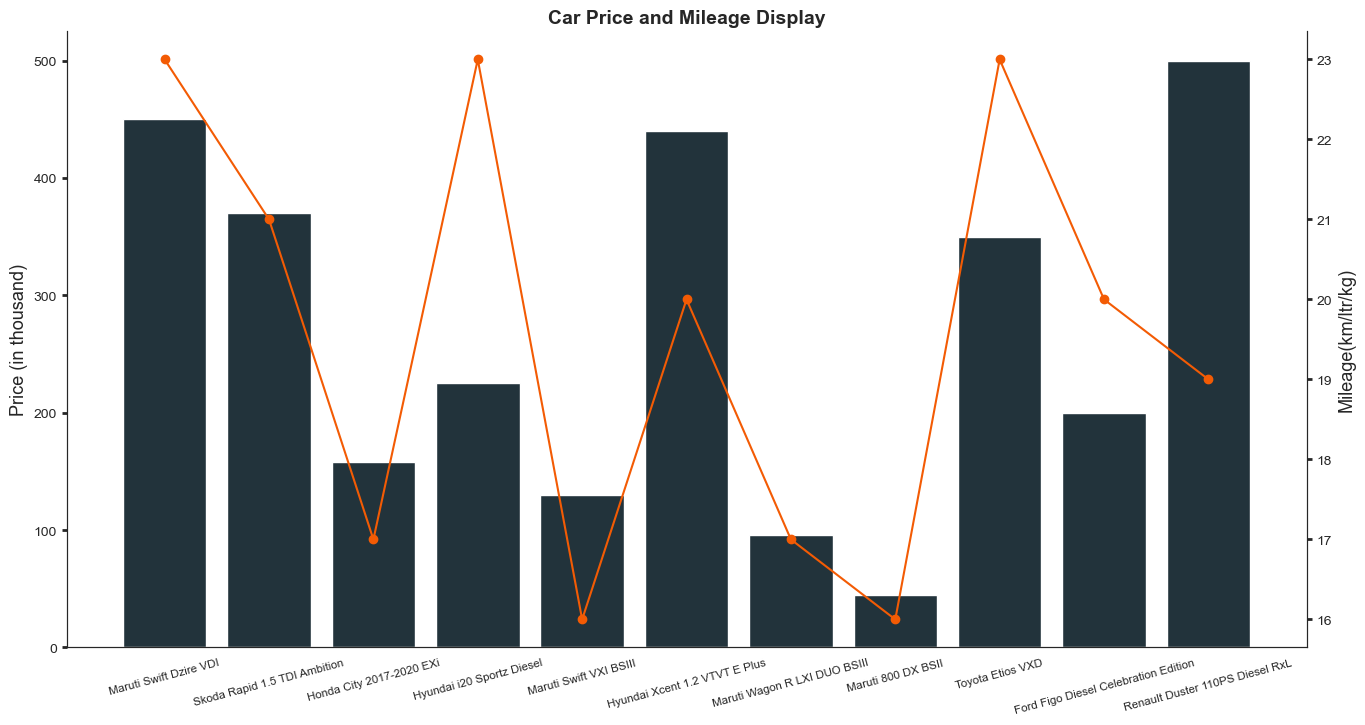

In [26]:
# Visualize the  first 10 car prices and mileage
fig, ax = plt.subplots(figsize = (16,8))
ax.bar(df_copy['Model Name'].head(11) ,
       df_copy['Price (in thousand)'].head(11),
       color = '#22333b')
ax.set_ylabel('Price (in thousand)',
              fontsize = 13)
ax.tick_params(axis = 'y',
               width = 2,
               labelsize = 'medium')
ax.tick_params(axis = 'x',
               width = 2,
               labelsize = 'small',
               rotation = 15)

ax1 = ax.twinx()
ax1.plot(df_copy['Model Name'].head(11),
         df_copy['Mileage(km/ltr/kg)'].head(11),
         color = '#f35b04',
         marker = 'o')
ax1.set_ylabel('Mileage(km/ltr/kg)',
               fontsize = 13)
ax1.tick_params(axis = 'y',
                width = 2,
                labelsize = 'medium')

ax.set_title('Car Price and Mileage Display',
             fontsize = 14,
             weight = 'bold')
sns.despine(right = False)
plt.show()

In [27]:
Car_Price_Data = df_copy
Car_Price_Data.to_csv('CarPriceData.csv')